<a href="https://colab.research.google.com/github/vyshnavinellore/2216129_AIML_BootCamp/blob/main/Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

step1:Load the dataset

In [ ]:
dataset="/content/sample_data/Employee_StudyHours (1).csv"
import pandas as pd
df = pd.read_csv(dataset)
df.head(10)

,Hours,Scores
0,2.5,21.0
1,5.1,47.0
2,3.2,27.0
3,8.5,75.0
4,3.5,30.0
5,1.5,20.0
6,9.2,88.0
7,5.5,60.0
8,8.3,81.0
9,2.7,25.0


In [ ]:
df.shape

(32, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   30 non-null     float64
 1   Scores  30 non-null     float64
dtypes: float64(2)
memory usage: 640.0 bytes


step2:visualization of dataset


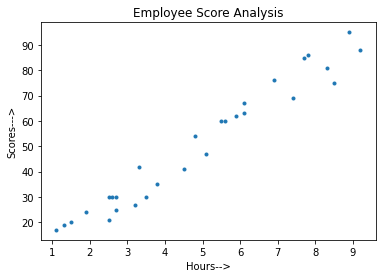

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df.Hours,df.Scores,marker='.')
plt.xlabel("Hours-->")
plt.ylabel("Scores--->")
plt.title("Employee Score Analysis")
plt.show()

step3:preprocessing the dataset

In [ ]:
#Method drop the rows with NaN values
df=df.dropna()
df.head()

,Hours,Scores
0,2.5,21.0
1,5.1,47.0
2,3.2,27.0
3,8.5,75.0
4,3.5,30.0


In [ ]:
import math
median_hours=math.floor(df.Hours.median())
median_hours

4

In [ ]:
df.Hours=df.Hours.fillna(median_hours)

In [ ]:
mean_Scores=math.floor(df.Scores.mean())
mean_Scores

50

In [ ]:
df.Scores=df.Scores.fillna(mean_Scores)

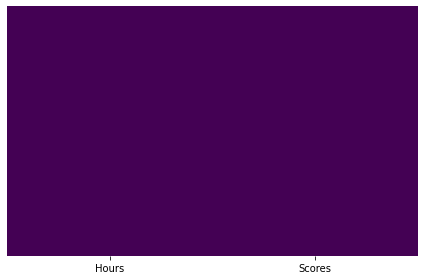

In [ ]:
#Seaborn
import seaborn as sns
def get_heatmap(df):
  plt.figure(figsize=(6,4))
  sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='viridis')
  plt.tight_layout()
  return plt.show()
  
get_heatmap(df)

Step4: Preparing the Data for feeding the model

In [ ]:
#method 1
X=df.iloc[:,:-1].values

Y=df.iloc[:,-1:].values
Y

array([[21.],
       [47.],
       [27.],
       [75.],
       [30.],
       [20.],
       [88.],
       [60.],
       [81.],
       [25.],
       [85.],
       [62.],
       [41.],
       [42.],
       [17.],
       [95.],
       [30.],
       [24.],
       [67.],
       [69.],
       [30.],
       [54.],
       [35.],
       [76.],
       [86.],
       [19.],
       [30.],
       [63.],
       [60.]])

In [ ]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8],
       [1.3],
       [2.6],
       [6.1],
       [5.6]])

In [ ]:
#method 2
import numpy as np
X1=np.array(df[['Hours']])
Y1=np.array(df[['Scores']])
X1

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8],
       [1.3],
       [2.6],
       [6.1],
       [5.6]])

In [ ]:
Y1

array([[21.],
       [47.],
       [27.],
       [75.],
       [30.],
       [20.],
       [88.],
       [60.],
       [81.],
       [25.],
       [85.],
       [62.],
       [41.],
       [42.],
       [17.],
       [95.],
       [30.],
       [24.],
       [67.],
       [69.],
       [30.],
       [54.],
       [35.],
       [76.],
       [86.],
       [19.],
       [30.],
       [63.],
       [60.]])

In [ ]:
#Splitting
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)
X_train

array([[1.1],
       [8.3],
       [2.5],
       [3.8],
       [1.9],
       [5.1],
       [7.7],
       [5.6],
       [9.2],
       [3.5],
       [6.1],
       [7.4],
       [2.7],
       [5.5],
       [7.8],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [ ]:
Y_train

array([[17.],
       [81.],
       [30.],
       [35.],
       [24.],
       [47.],
       [85.],
       [60.],
       [88.],
       [30.],
       [67.],
       [69.],
       [25.],
       [60.],
       [86.],
       [75.],
       [21.],
       [54.],
       [95.],
       [41.]])

In [ ]:
X_test

array([[3.2],
       [2.7],
       [6.9],
       [3.3],
       [5.9],
       [1.3],
       [6.1],
       [2.6],
       [1.5]])

step:traing the ml model

In [ ]:
#training model - Fitting the alogrithm
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,Y_train)
LinearRegression()

LinearRegression()

step6:Testing the ML model

In [ ]:
Y_pred=model.predict(X_test)
Y_pred

array([[33.20226498],
       [28.29495276],
       [69.51637539],
       [34.18372742],
       [59.70175095],
       [14.55447855],
       [61.66467584],
       [27.31349032],
       [16.51740344]])

In [ ]:
Y_test

array([[27.],
       [30.],
       [76.],
       [42.],
       [62.],
       [19.],
       [63.],
       [30.],
       [20.]])

Step7: Understanding the ML model performance

In [ ]:
print("predicted value for training data:",model.score(X_train,Y_train))
print("Training accuracy:",model.score(X_train,Y_train*100))

predicted value for training data: 0.9534048076263634
Training accuracy: -4.682863673303443


In [ ]:
print("predicted value for testing data:",model.score(X_test,Y_test))
print("Testing accuracy:",model.score(X_test,Y_test*100))

predicted value for testing data: 0.9457369676977954
Testing accuracy: -4.20634926576192


In [ ]:
accuracy=model.score(X,Y)*100
print(accuracy)

95.49178273827442


In [ ]:
model.coef_

array([[9.81462443]])

In [ ]:
model.intercept_

array([1.79546678])

Visualizing Results



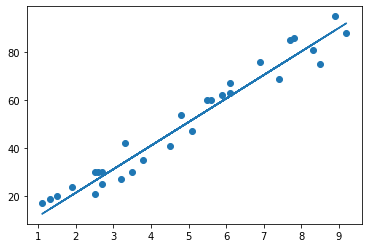

In [ ]:
#plotting the linear reg
line = model.coef_*X+model.intercept_

#plot
plt.scatter(X,Y)
plt.plot(X,line)
plt.show()

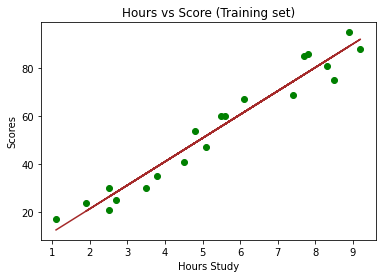

In [ ]:
#Train set result
plt.scatter(X_train,Y_train, color='green')
plt.plot(X_train, model.predict(X_train), color='brown')
plt.title('Hours vs Score (Training set)')
plt.xlabel('Hours Study')
plt.ylabel('Scores')
plt.show()

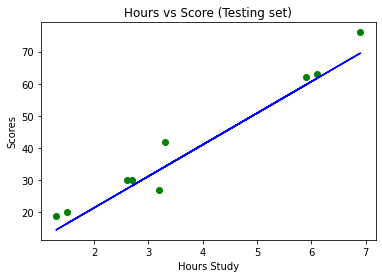

In [ ]:
#Test set
plt.scatter(X_test,Y_test, color='green')
plt.plot(X_test, model.predict(X_test), color='blue')
plt.title('Hours vs Score (Testing set)')
plt.xlabel('Hours Study')
plt.ylabel('Scores')
plt.show()